In [1]:
workDir = "/Users/sdporzio/HighVoltageTask"
%matplotlib inline
import numpy as np
from StringIO import StringIO
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime
import time
import sys
import ROOT
from IPython.display import Image as Plot
sys.path.insert(0, workDir)
import HvPackages.probability as prob
from HvPackages.dataFunctions import GetDateString as GDS
from HvPackages.dataFunctions import GetTimeString as GTS
fermilabOffset = -6*60*60
ROOT.gStyle.SetTimeOffset(fermilabOffset)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
ROOT.gStyle.SetOptStat(0)
ROOT.gROOT.ForceStyle()

def destruct(object_):
    if issubclass(type(object_), ROOT.TObject):
        object_.IsA().Destructor(object_)

# Good fit
g_xres = 950
g_yres = 425

In [2]:
dataPmt = np.genfromtxt(workDir+"/Timestamps/pmtHitsFromTorScopeMon.dat",delimiter=" ",names=True,dtype=None)
dataHv = np.genfromtxt(workDir+"/Timestamps/hvBlipsFromData.dat",delimiter=" ",names=True,dtype=None)
dataFlasher = np.genfromtxt(workDir+"/Timestamps/FlasherRuns/flasherRunsTimestamps.dat",delimiter=" ",names=True,dtype=None)
toRemove = []
preCutData = len(dataPmt)
for i,timestamp in enumerate(dataPmt["Timestamp"]):
    for j in range(len(dataFlasher)):
        if timestamp > dataFlasher['Start'][j] and timestamp < dataFlasher['End'][j]: toRemove.append(i)
    if timestamp == 0: toRemove.append(i)
        
dataPmt = np.delete(dataPmt,toRemove,0) 
print "Available data: ", preCutData
print "Data eliminated: ", preCutData - len(dataPmt)

Available data:  19396
Data eliminated:  52


In [14]:
startTime = 1448148352
endTime = 1454500456
nBins = 250
binWidth = ((endTime-startTime)/float(nBins))/float((60*60)) #in hours

In [15]:
j = 0
for cutY in np.arange(-200,0,2):
#     startTime = ROOT.TDatime(2015,10,01,00,00,00).Convert()
    weekTime = 604800
    nWeeks = 20
    nDays = nWeeks*7
    daysPerBin = 1
#     endTime = startTime + weekTime*nWeeks
#     nBins = int(nDays/daysPerBin)
    ROOT.gStyle.SetOptStat(1)

    c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
    h1 = ROOT.TH1D("hNumberPmt","PMT/HV Rate Vs. Time [Flasher removed, Pulser NOT removed]",nBins,startTime,endTime)
    h2 = ROOT.TH1D("hNumberHv","Events vs. Time",nBins,startTime,endTime)
    timeDivisions = int(nWeeks/4) + 4*100
    h1.SetLineColor(ROOT.kRed)
    h1.GetXaxis().SetTimeDisplay(1)
    h1.GetXaxis().SetNdivisions(timeDivisions,0)
    h2.SetLineColor(ROOT.kBlue)
    h2.GetXaxis().SetTimeDisplay(1)
    h2.GetXaxis().SetNdivisions(timeDivisions,0)

    for (i,timestamp) in enumerate(dataPmt["Timestamp"]):
        if dataPmt["MinY1"][i] < cutY and dataPmt["MinY2"][i] < cutY \
        and dataPmt["MinY3"][i] < cutY and dataPmt["MinY4"][i] < cutY: 
            h1.Fill(timestamp)

    for (i,timestamp) in enumerate(dataHv["Timestamp"]):
        h2.Fill(timestamp)

    h1.SetStats(0)
    h1.SetMaximum(50)
    h1.Draw("")
    h2.Draw("SAME")

    leg = ROOT.TLegend(0.68,0.68,0.88,0.88);
    leg.AddEntry(h2, "HV Events", "l");
    leg.AddEntry(h1, "PMT Events", "l");
    leg.Draw()

    paveText = ROOT.TPaveText(0.12,0.75,0.22,0.88,"NDC")
    lineCut = "CutY: %i" %(cutY)
    lineHV = "HV events: %i" %(h2.GetEntries())
    linePMT = "PMT events: %i" %(h1.GetEntries())
    lineWidth = "Bin Width: %.1f h" %(binWidth)
    paveText.AddText(lineCut)
    paveText.AddText(lineHV)
    paveText.AddText(linePMT)
    paveText.AddText(lineWidth)
    paveText.Draw()


    outFile = "PlotsGlobalFine/histo%.02i.png" %j
    c1.SaveAs(outFile)
    destruct(c1)
    destruct(h1)
    destruct(h2)
    destruct(leg)
    destruct(paveText)
    j+=1

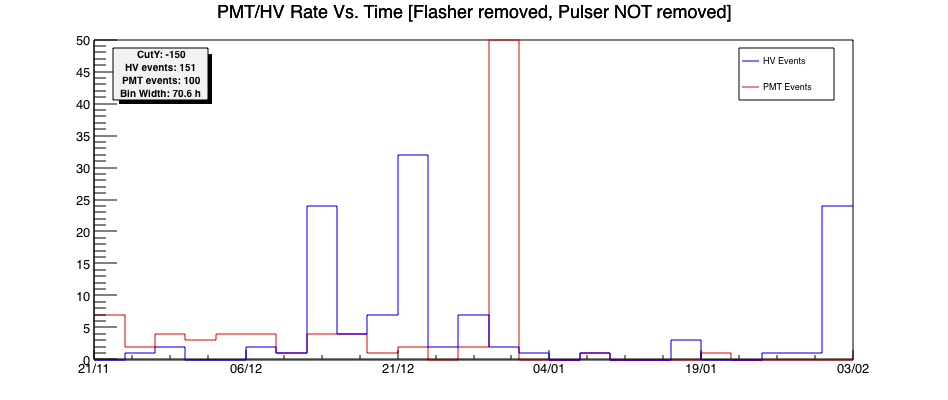

In [11]:
cutY = -150
# startTime = ROOT.TDatime(2015,10,1,0,0,0).Convert()
weekTime = 604800
nWeeks = 20
nDays = nWeeks*7
daysPerBin = 1
# endTime = startTime + weekTime*nWeeks
# nBins = int(nDays/daysPerBin)
ROOT.gStyle.SetOptStat(1)

c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1D("hNumberPmt","PMT/HV Rate Vs. Time [Flasher removed, Pulser NOT removed]",nBins,startTime,endTime)
h2 = ROOT.TH1D("hNumberHv","Events vs. Time",nBins,startTime,endTime)
timeDivisions = int(nWeeks/4) + 4*100
h1.SetLineColor(ROOT.kRed)
h1.GetXaxis().SetTimeDisplay(1)
h1.GetXaxis().SetNdivisions(timeDivisions,0)
h2.SetLineColor(ROOT.kBlue)
h2.GetXaxis().SetTimeDisplay(1)
h2.GetXaxis().SetNdivisions(timeDivisions,0)

for (i,timestamp) in enumerate(dataPmt["Timestamp"]):
    if dataPmt["MinY1"][i] < cutY and dataPmt["MinY2"][i] < cutY \
    and dataPmt["MinY3"][i] < cutY and dataPmt["MinY4"][i] < cutY: 
        h1.Fill(timestamp)

for (i,timestamp) in enumerate(dataHv["Timestamp"]):
    h2.Fill(timestamp)

h1.SetStats(0)
h1.SetMaximum(50)
h1.Draw("")
h2.Draw("SAME")

leg = ROOT.TLegend(0.78,0.75,0.88,0.88);
leg.AddEntry(h2, "HV Events", "l");
leg.AddEntry(h1, "PMT Events", "l");
leg.Draw()

paveText = ROOT.TPaveText(0.12,0.75,0.22,0.88,"NDC")
lineCut = "CutY: %i" %(cutY)
lineHV = "HV events: %i" %(h2.GetEntries())
linePMT = "PMT events: %i" %(h1.GetEntries())
lineWidth = "Bin Width: %.1f h" %(binWidth)
paveText.AddText(lineCut)
paveText.AddText(lineHV)
paveText.AddText(linePMT)
paveText.AddText(lineWidth)
paveText.Draw()


outName = "PlotsZoom/histoNorm.png"
c1.SaveAs(outName)
destruct(c1)
destruct(h1)
destruct(h2)
destruct(leg)
destruct(paveText)
Plot(outName)